<a href="https://colab.research.google.com/github/Shahitha-Banu/Toxic-Tweets-Dataset-NLP/blob/main/Toxic_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import string
from google.colab import drive

drive.mount("/content/drive")
df = pd.read_csv(r"/content/drive/MyDrive/FinalBalancedDataset.csv")

Mounted at /content/drive


In [ ]:
df.info()
#df.describe()
df.isna().sum()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56745 entries, 0 to 56744
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  56745 non-null  int64 
 1   Toxicity    56745 non-null  int64 
 2   tweet       56745 non-null  object
dtypes: int64(2), object(1)
memory usage: 1.3+ MB


,Unnamed: 0,Toxicity,tweet
0,0,0,@user when a father is dysfunctional and is s...
1,1,0,@user @user thanks for #lyft credit i can't us...
2,2,0,bihday your majesty
3,3,0,#model i love u take with u all the time in ...
4,4,0,factsguide: society now #motivation


In [ ]:
df.drop("Unnamed: 0", axis = 1, inplace = True)

In [ ]:
#Formatting the string by removing puntuations and digits

def removePuntuationDigits(str1):
  newstr1 = ""
  for i in range(len(str1)):
    if str1[i] in string.punctuation or str1[i] in string.digits:
      newstr1 += " "
    else:
      newstr1 += str1[i].lower()
  newstr1 = " ".join(newstr1.split())
  return newstr1

In [ ]:
df["updatedTweet"] = df['tweet'].apply(lambda x : removePuntuationDigits(x))

In [ ]:
df.drop("tweet", axis = 1, inplace = True)
df.head()

,Toxicity,updatedTweet
0,0,user when a father is dysfunctional and is so ...
1,0,user user thanks for lyft credit i can t use c...
2,0,bihday your majesty
3,0,model i love u take with u all the time in urð...
4,0,factsguide society now motivation


In [ ]:
import spacy
from spacy import displacy
nlp = spacy.load("en_core_web_sm")

In [ ]:
#Removal of stop words
def removeStopWords(text):
    filtered_sentence = []
    for word in text.split(' '):
        lexeme = nlp.vocab[word]
        if lexeme.is_stop == False:
            filtered_sentence.append(word)
    return " ".join(filtered_sentence)

In [ ]:
df["TweetWithoutStopWord"] = df["updatedTweet"].apply(lambda x: removeStopWords(x))

In [ ]:
df.drop("updatedTweet", axis = 1, inplace = True)
df.head()

,Toxicity,TweetWithoutStopWord
0,0,user father dysfunctional selfish drags kids d...
1,0,user user thanks lyft credit t use cause don t...
2,0,bihday majesty
3,0,model love u u time urð± ðððð ð...
4,0,factsguide society motivation


In [ ]:
#Applying lemmatization for all words of "text"
def lemmatizer(text):
    return " ".join([token.lemma_ for token in nlp(text)])

In [ ]:
df["cleanedTweet"] = df["TweetWithoutStopWord"].apply(lambda x: lemmatizer(x))

In [ ]:
df.drop("TweetWithoutStopWord", axis = 1, inplace = True)
df.head()

,Toxicity,cleanedTweet
0,0,user father dysfunctional selfish drag kid dys...
1,0,user user thank lyft credit t use cause don t ...
2,0,bihday majesty
3,0,model love u u time urð± ðððð ð...
4,0,factsguide society motivation


In [ ]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56745 entries, 0 to 56744
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Toxicity      56745 non-null  int64 
 1   cleanedTweet  56745 non-null  object
dtypes: int64(1), object(1)
memory usage: 886.8+ KB


Toxicity        0
cleanedTweet    0
dtype: int64

In [ ]:
df.to_csv(r"/content/drive/MyDrive/cleanedData.csv", index = False )

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [ ]:
#BagOfWords
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
bow = bow_vectorizer.fit_transform(df['cleanedTweet'])
bow.shape

(56745, 20073)

In [ ]:
print(bow)

In [ ]:
#TF-IDF Score
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(df['cleanedTweet'])
tfidf.shape

(56745, 20073)

In [ ]:
print(tfidf_vectorizer.vocabulary_)

{'user': 18490, 'father': 5826, 'selfish': 15416, 'drag': 4881, 'kid': 9512, 'dysfunction': 5056, 'run': 14984, 'thank': 17337, 'lyft': 10576, 'credit': 3826, 'use': 18484, 'cause': 2725, 'don': 4797, 'offer': 12482, 'wheelchair': 19217, 'van': 18550, 'pdx': 13073, 'getthanke': 6773, 'bihday': 1643, 'majesty': 10675, 'model': 11395, 'love': 10431, 'time': 17637, 'urð': 18477, 'factsguide': 5711, 'society': 16118, 'motivation': 11557, 'huge': 8070, 'fan': 5775, 'fare': 5791, 'big': 1617, 'talk': 17092, 'leave': 9934, 'chaos': 2874, 'pay': 13048, 'dispute': 4662, 'camping': 2542, 'tomorrow': 17753, 'school': 15271, 'year': 19734, 'exam': 5567, 'think': 17514, 'hate': 7524, 'imagine': 8343, 'actorslife': 122, 'girl': 6843, 'win': 19339, 'land': 9794, 'allin': 386, 'cavs': 2732, 'champions': 2853, 'cleveland': 3221, 'welcome': 19126, 'gr': 7082, 'ireland': 8746, 'consumer': 3577, 'price': 13750, 'index': 8443, 'mom': 11429, 'climb': 3235, 'previous': 13744, 'blog': 1845, 'silver': 15776, '

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.cleanedTweet,
    df.Toxicity,
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df.Toxicity
)

In [ ]:
def displayReport(y_test, y_pred1, y_pred2, y_pred_proba1, y_pred_proba2, classifier):
   #5. Calculate classification metrics
  fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred_proba1)
  roc_auc1 = roc_auc_score(y_test, y_pred_proba1)

  fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred_proba2)
  roc_auc2 = roc_auc_score(y_test, y_pred_proba2)

  #6. Print and plot the metrics
  print(f"Classification Report for {classifier} with TF-IDF:")
  print(classification_report(y_test, y_pred1))
  print(f"Classification Report for {classifier} with BOW:")
  print(classification_report(y_test, y_pred2))

  print(f"AUC for {classifier} with TF-IDF: {roc_auc1:.2f}")
  print(f"AUC for {classifier} with BOW: {roc_auc2:.2f}")

  #7. Plotting Confution matrix
  confusion_matrix1 = confusion_matrix(y_test, y_pred1)
  confusion_matrix2 = confusion_matrix(y_test, y_pred2)

  cm_display1 = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix1, display_labels = ["Non-Toxic", "Toxic"])
  cm_display2 = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix2, display_labels = ["Non-Toxic", "Toxic"])

  cm_display1.plot()
  plt.title(f'Confution Matrix for {classifier} TF-IDF ')
  cm_display2.plot()
  plt.title(f'Confution Matrix for {classifier} BOW ')
  plt.show()

  #8. Plotting ROC curve
  plt.figure(figsize=(4, 4))
  plt.plot(fpr1, tpr1, label=f'AUC = {roc_auc1:.2f}')
  plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'ROC Curve for {classifier} TF-IDF ')
  plt.legend()
  plt.show()

  plt.figure(figsize=(4, 4))
  plt.plot(fpr2, tpr2, label=f'AUC = {roc_auc2:.2f}')
  plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'ROC Curve for {classifier} BOW ')
  plt.legend()
  plt.show()

Classification Report for KNN Classifier with TF-IDF:
              precision    recall  f1-score   support

           0       0.61      0.99      0.76      6518
           1       0.93      0.15      0.26      4831

    accuracy                           0.63     11349
   macro avg       0.77      0.57      0.51     11349
weighted avg       0.75      0.63      0.55     11349

Classification Report for KNN Classifier with BOW:
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      6518
           1       0.97      0.77      0.86      4831

    accuracy                           0.89     11349
   macro avg       0.91      0.88      0.89     11349
weighted avg       0.90      0.89      0.89     11349

AUC for KNN Classifier with TF-IDF: 0.72
AUC for KNN Classifier with BOW: 0.94


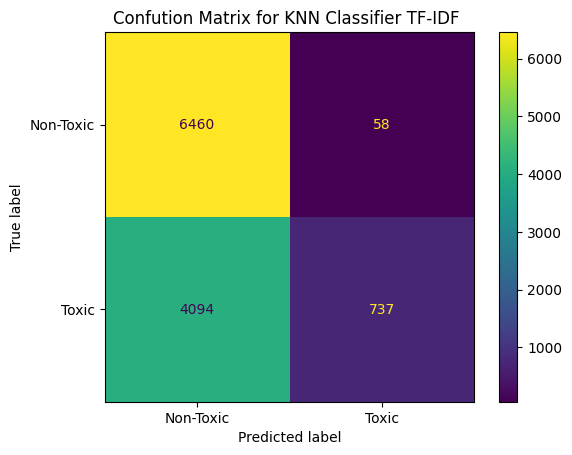

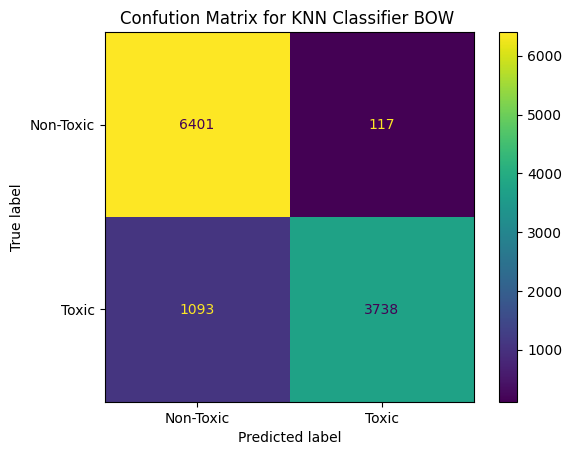

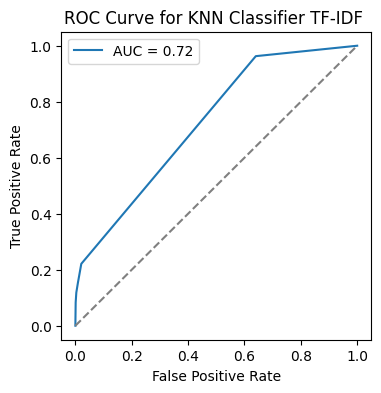

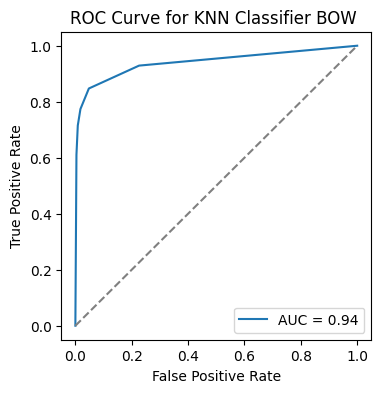

In [ ]:
#use TF-IDF and BOW for pre-processing the text.

from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

#use KNN as the classifier
from sklearn.neighbors import KNeighborsClassifier

#1. create a pipeline object
clf1 = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),
     ('KNN', KNeighborsClassifier())
])
clf2 = Pipeline([
     ('vectorizer_bow',CountVectorizer()),
     ('KNN', KNeighborsClassifier())])

#2. fit with X_train and y_train
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)

#3. get the predictions for X_test and store it in y_pred
y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)

#4. get the prediction probability for X_test positive lable and store it in y_pred_proba
y_pred_proba1 = clf1.predict_proba(X_test)[:, 1]
y_pred_proba2 = clf2.predict_proba(X_test)[:, 1]

displayReport(y_test, y_pred1, y_pred2, y_pred_proba1, y_pred_proba2, "KNN Classifier")

Classification Report for Naive Bayes Classifier with TF-IDF:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      6518
           1       0.91      0.91      0.91      4831

    accuracy                           0.92     11349
   macro avg       0.92      0.92      0.92     11349
weighted avg       0.92      0.92      0.92     11349

Classification Report for Naive Bayes Classifier with BOW:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      6518
           1       0.88      0.94      0.91      4831

    accuracy                           0.92     11349
   macro avg       0.92      0.92      0.92     11349
weighted avg       0.92      0.92      0.92     11349

AUC for Naive Bayes Classifier with TF-IDF: 0.97
AUC for Naive Bayes Classifier with BOW: 0.98


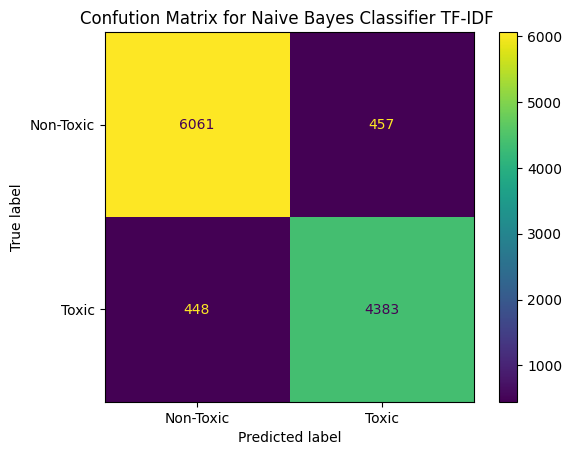

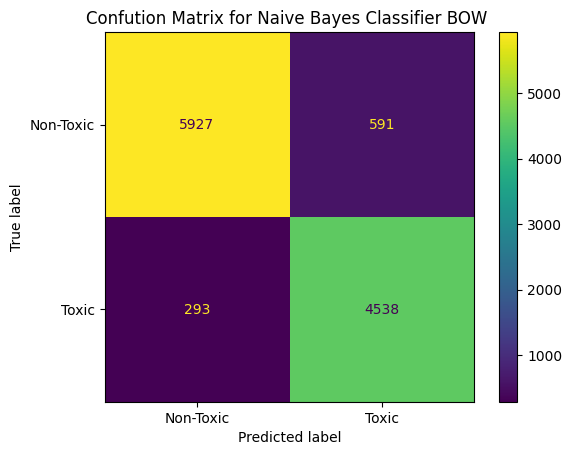

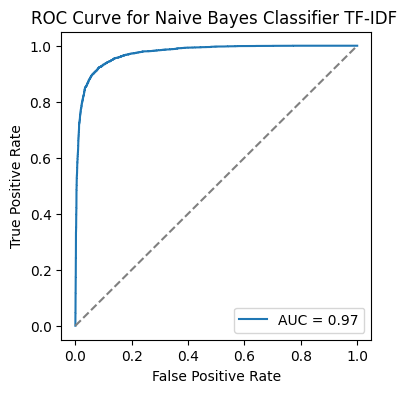

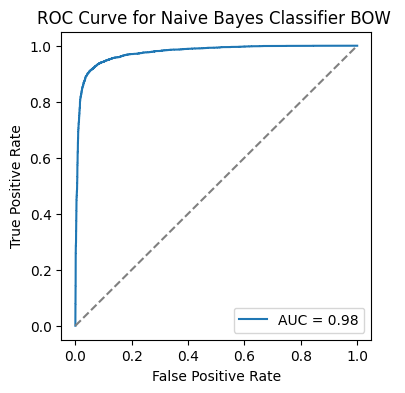

In [ ]:
#use naive bayes as the classifier
from sklearn.naive_bayes import MultinomialNB

#1. create a pipeline object
clf1 = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),
     ('Multi NB', MultinomialNB())
])
clf2 = Pipeline([
     ('vectorizer_bow',CountVectorizer()),
     ('Multi NB', MultinomialNB())])

#2. fit with X_train and y_train
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)

#3. get the predictions for X_test and store it in y_pred
y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)

#4. get the prediction probability for X_test and store it in y_pred_proba
y_pred_proba1 = clf1.predict_proba(X_test)[:, 1]
y_pred_proba2 = clf2.predict_proba(X_test)[:, 1]

#Display the metrics
displayReport(y_test, y_pred1, y_pred2, y_pred_proba1, y_pred_proba2, "Naive Bayes Classifier")

Classification Report for Random Forest Classifier with TF-IDF:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      6518
           1       0.93      0.92      0.93      4831

    accuracy                           0.94     11349
   macro avg       0.94      0.94      0.94     11349
weighted avg       0.94      0.94      0.94     11349

Classification Report for Random Forest Classifier with BOW:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      6518
           1       0.94      0.92      0.93      4831

    accuracy                           0.94     11349
   macro avg       0.94      0.94      0.94     11349
weighted avg       0.94      0.94      0.94     11349

AUC for Random Forest Classifier with TF-IDF: 0.98
AUC for Random Forest Classifier with BOW: 0.98


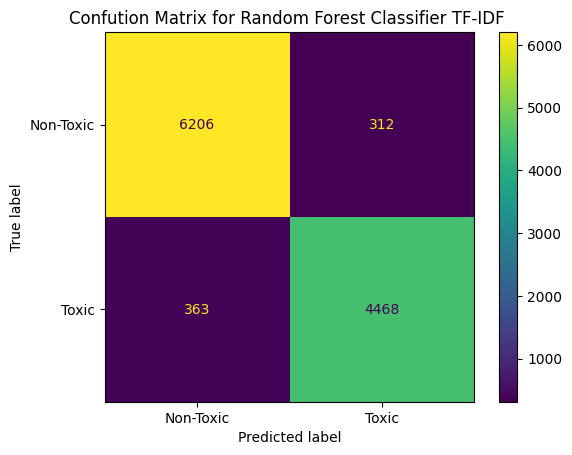

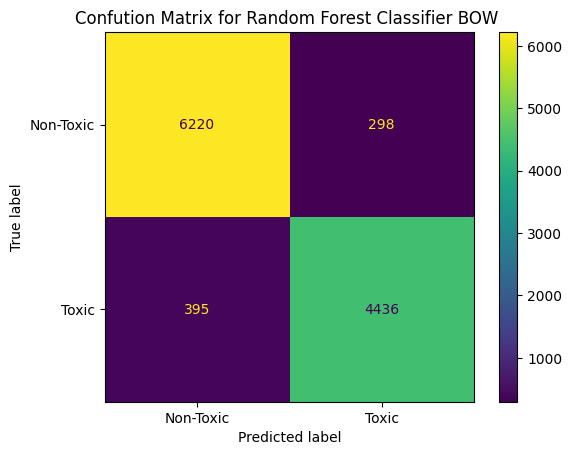

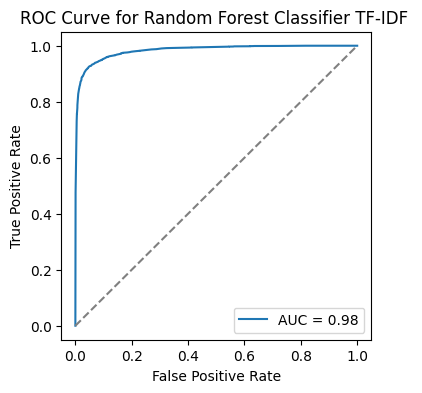

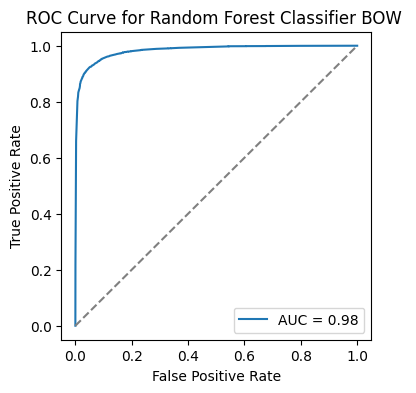

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#1. create a pipeline object
clf1 = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),
     ('Random Forest', RandomForestClassifier())
])
clf2 = Pipeline([
     ('vectorizer_bow',CountVectorizer()),
     ('Random Forest', RandomForestClassifier())])

#2. fit with X_train and y_train
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)

#3. get the predictions for X_test and store it in y_pred
y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)

#4. get the prediction probability for X_test and store it in y_pred_proba
y_pred_proba1 = clf1.predict_proba(X_test)[:, 1]
y_pred_proba2 = clf2.predict_proba(X_test)[:, 1]

#Display the metrics
displayReport(y_test, y_pred1, y_pred2, y_pred_proba1, y_pred_proba2, "Random Forest Classifier")

Classification Report for Decision Tree with TF-IDF:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      6518
           1       0.92      0.92      0.92      4831

    accuracy                           0.93     11349
   macro avg       0.93      0.93      0.93     11349
weighted avg       0.93      0.93      0.93     11349

Classification Report for Decision Tree with BOW:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      6518
           1       0.92      0.92      0.92      4831

    accuracy                           0.93     11349
   macro avg       0.93      0.93      0.93     11349
weighted avg       0.93      0.93      0.93     11349

AUC for Decision Tree with TF-IDF: 0.93
AUC for Decision Tree with BOW: 0.93


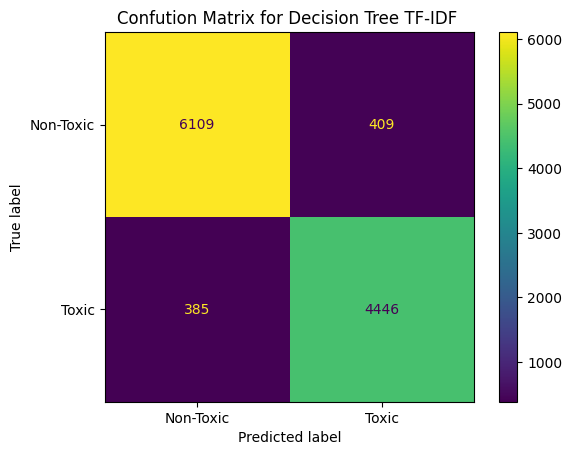

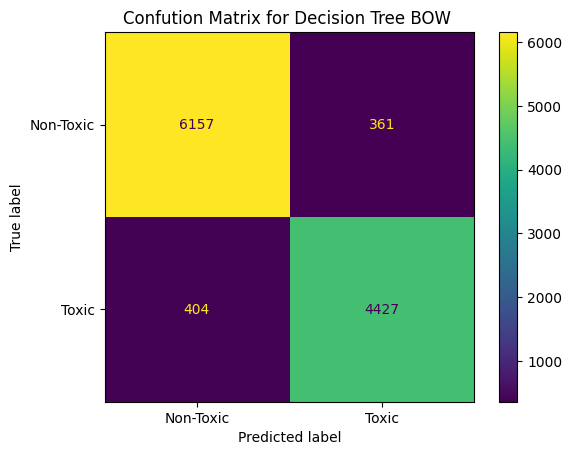

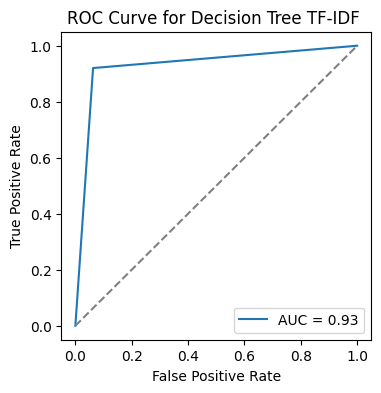

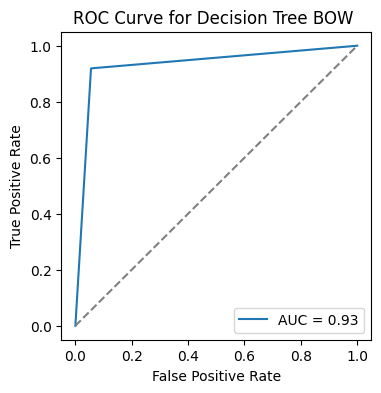

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#1. create a pipeline object
clf1 = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),
     ('Decision Tree', DecisionTreeClassifier())
])
clf2 = Pipeline([
     ('vectorizer_bow',CountVectorizer()),
     ('Decision Tree', DecisionTreeClassifier())])

#2. fit with X_train and y_train
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)

#3. get the predictions for X_test and store it in y_pred
y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)

#4. get the prediction probability for X_test and store it in y_pred_proba
y_pred_proba1 = clf1.predict_proba(X_test)[:, 1]
y_pred_proba2 = clf2.predict_proba(X_test)[:, 1]

#Display the metrics
displayReport(y_test, y_pred1, y_pred2, y_pred_proba1, y_pred_proba2, "Decision Tree")

Classification Report for SVM with TF-IDF:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      6518
           1       0.95      0.93      0.94      4831

    accuracy                           0.95     11349
   macro avg       0.95      0.95      0.95     11349
weighted avg       0.95      0.95      0.95     11349

Classification Report for SVM with BOW:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      6518
           1       0.94      0.93      0.94      4831

    accuracy                           0.95     11349
   macro avg       0.95      0.94      0.94     11349
weighted avg       0.95      0.95      0.95     11349



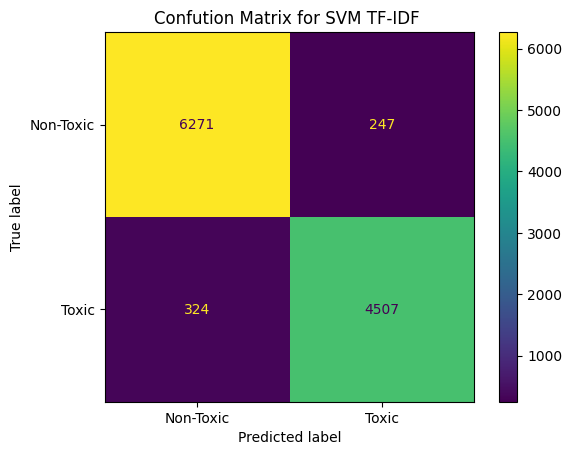

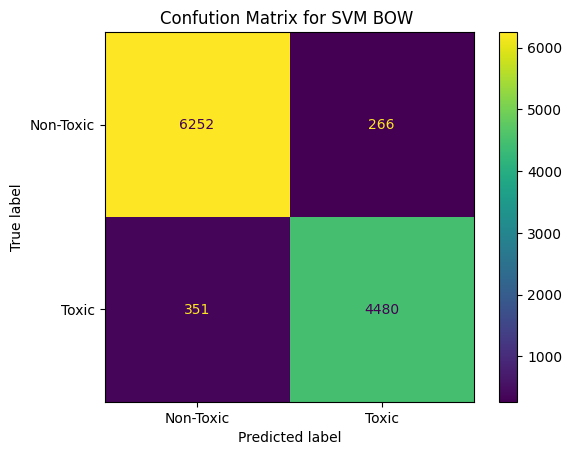

In [ ]:
from sklearn.svm import LinearSVC

#1. create a pipeline object
clf1 = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),
     ('SVC', LinearSVC(max_iter = 10000))
])
clf2 = Pipeline([
     ('vectorizer_bow',CountVectorizer()),
     ('SVC', LinearSVC(max_iter = 10000))])

#2. fit with X_train and y_train
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)

#3. get the predictions for X_test and store it in y_pred
y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)

#4. Print and plot the metrics
print("Classification Report for SVM with TF-IDF:")
print(classification_report(y_test, y_pred1))
print("Classification Report for SVM with BOW:")
print(classification_report(y_test, y_pred2))

#5. Plotting Confution matrix
confusion_matrix1 = confusion_matrix(y_test, y_pred1)
confusion_matrix2 = confusion_matrix(y_test, y_pred2)

cm_display1 = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix1, display_labels = ["Non-Toxic", "Toxic"])
cm_display2 = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix2, display_labels = ["Non-Toxic", "Toxic"])

cm_display1.plot()
plt.title('Confution Matrix for SVM TF-IDF ')
cm_display2.plot()
plt.title('Confution Matrix for SVM BOW ')
plt.show()